## Jorge Bueno Perez - 419034

## Prediction of the average price of the Spanish rail tickets data 

In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
details = ["On test", "Mean Absolute Error", "Root Mean Squared Error", "RSR test", "RSR train"]
model1 = ["Bagging", "6.4601", "11.3028", "84.86", "86.58"]
model2 = ["Boosting", "6.1461", "10.9028", "85.92", "87.73"]
model3 = ["Decision trees", "6.6487", "11.6445", "83.93", "85.85"]
model4 = ["Random forest", "6.4603", "11.3032", "84.86", "84.86"]
model5 = ["Xgboosting",  "6.1251", "11.0720", "85.48", "88.62"]

In [3]:
df = pd.DataFrame(data= [model1, model2, model3, model4, model5],
                 columns= details)
df

,On test,Mean Absolute Error,Root Mean Squared Error,RSR test,RSR train
0,Bagging,6.4601,11.3028,84.86,86.58
1,Boosting,6.1461,10.9028,85.92,87.73
2,Decision trees,6.6487,11.6445,83.93,85.85
3,Random forest,6.4603,11.3032,84.86,84.86
4,Xgboosting,6.1251,11.0720,85.48,88.62


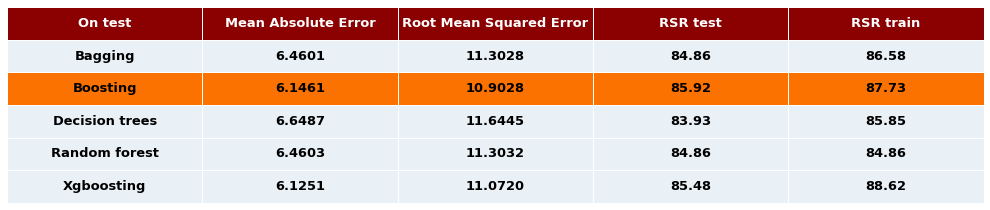

In [4]:
def render_mpl_table(data, col_width=2.0, row_height=0.6, font_size=13,
                     header_color='darkred', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    colors = [5 * ["#e9f1f7"],
              5 * ["#fc7200"],
              5 * [ "#e9f1f7"],
              5 *[ "#e9f1f7"],
            5 *[ "#e9f1f7"]]
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs, cellLoc= "center", cellColours=colors)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    
    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w', multialignment= 'center')
            cell.set_facecolor(header_color)
        else:
            cell.set_text_props(weight='bold', color='black', horizontalalignment= 'center')
    return ax.get_figure(), ax
    set_align_for_column(mpl_table, align="center")

fig,ax = render_mpl_table(df, header_columns=0, col_width=3.5)
fig.savefig("table_results.png")

### As per the above table, it seems the `Boosting` model is the best one, it has the greatest `R square score` on the `test sample`, equal to `87.73`
### However, taking into consideration the `R square score` on the `training sample`, the `Xgboosting` model seems to have the greatest score. This result is according to the conclussion made before, which suggests that in this model there is `overfitting problem`